In [66]:
#Import file
import pandas as pd
from plotly import express as px

import os
for dirname, _, filenames in os.walk('/Unsupervised Learning on Country Data/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Unsupervised Learning on Country Data/Datasets\Country-data.csv
/Unsupervised Learning on Country Data/Datasets\data-dictionary.csv


In [67]:
#Load file
df = pd.read_csv("Datasets/Country-data.csv")

In [68]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [69]:
df.shape

(167, 10)

In [70]:
df.info()
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


False

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [72]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [73]:
int_cols= df.select_dtypes(exclude='object').columns
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

# Scaler data

In [74]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df.drop(['country'], axis=1))

# Modeling

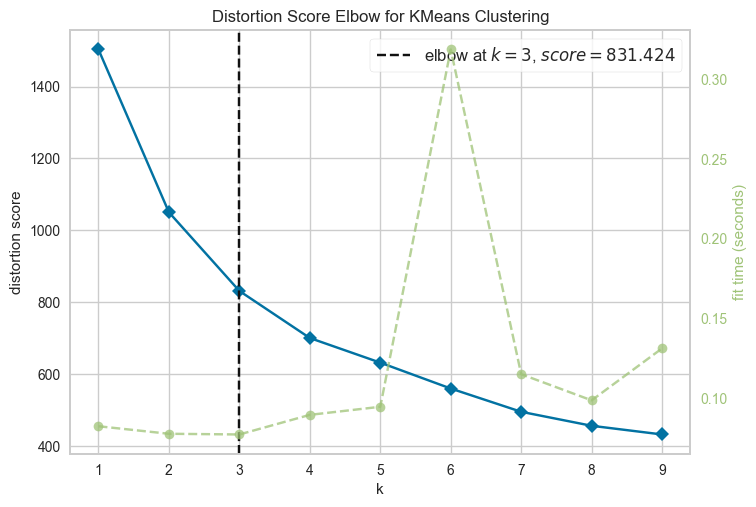

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualize_elbow = KElbowVisualizer(model, k=(1,10))
visualize_elbow.fit(df_scaled)
visualize_elbow.poof()

$\Rightarrow$ Chose k = 3

In [76]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaled)
df['Kmean_labels'] = model.labels_


child_mort  exports  health  imports  \
Kmeans_labels country                                                      
0             Afghanistan                 90.2     10.0    7.58     44.9   
              Angola                     119.0     62.3    2.85     42.9   
              Benin                      111.0     23.8    4.10     37.2   
              Botswana                    52.5     43.6    8.30     51.3   
              Burkina Faso               116.0     19.2    6.74     29.6   
...                                        ...      ...     ...      ...   
2             Sweden                       3.0     46.2    9.63     40.7   
              Switzerland                  4.5     64.0   11.50     53.3   
              United Arab Emirates         8.6     77.7    3.66     63.6   
              United Kingdom               5.2     28.2    9.64     30.8   
              United States                7.3     12.4   17.90     15.8   

                                     income  inflation  life_expec  total_fer  \
Kmeans_labels country                                                           
0             Afghanistan            1610.0      9.440        56.2       5.82   
              Angola                 5900.0     22.400        60.1       6.16   
              Benin                  1820.0      0.885        61.8       5.36   
              Botswana              13300.0      8.920        57.1       2.88   
              Burkina Faso           1430.0      6.810        57.9       5.87   
...                                     ...        ...         ...        ...   
2             Sweden                42900.0      0.991        81.5       1.98   
              Switzerland           55500.0      0.317        82.2       1.52   
              United Arab Emirates  57600.0     12.500        76.5       1.87   
              United Kingdom        36200.0      1.570        80.3       1.92   
              United States         49400.0      1.220        78.7       1.93   

                                       gdpp  
Kmeans_labels country                        
0             Afghanistan             553.0  
              Angola                 3530.0  
              Benin                   758.0  
              Botswana               6350.0  
              Burkina Faso            575.0  
...                                     ...  
2             Sweden                52100.0  
              Switzerland           74600.0  
              United Arab Emirates  35000.0  
              United Kingdom        38900.0  
              United States         48400.0  

[167 rows x 9 columns]

In [ ]:
df.groupby(['Kmean_labels', 'country']).mean()

In [84]:
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
df['Kmeans_labels'] = df['Kmeans_labels'].map(cat)

px.choropleth(data_frame=df, locationmode='country names', locations='country',color=df['Kmeans_labels'], title='Countries by category that need help',
              color_discrete_map={'Need Help':'#ff0000','Might need help':'#ffff00','No Help needed':'#00FFFF'} ,projection='equirectangular')